# Assessing Vocal Measurements to Predict Parkinson’s Disease

Group 6: Naomi Choong, Yashas Ganesh Prasad, Braydon Newman, Marylyn Yuwono

# Introduction: 
Parkinson’s Disease (PD), a progressive neurodegenerative disorder impairing motor abilities, is characterized by tremors, stiffness, and slowed movements. Many individuals with PD also experience voice problems including abnormal voice quality, volume and pitch (Ma et al., 2020). Evidence shows vocal changes manifest during the prodromal phase of PD, prior to onset of clinical symptoms and diagnosis (Harel et al., 2004). This suggests that vocal measurements may be a potential biomarker to detect early stage PD. Early detection and treatment can slow disease progression and may help mitigate symptoms. 

To investigate potential vocal biomarkers of PD, we aim to answer the following question: **Can acoustic measurements of voice predict Parkinson’s disease based on voice recordings?**

We will analyze a dataset of various acoustic measurements from vocal recordings of 31 subjects. Data was collected by Little et al. (2009). An average of 6 recordings of sustained vowel phonation were taken for each subject.  Each row in the dataset corresponds to one voice recording from a subject.

Source: https://www.kaggle.com/datasets/gargmanas/parkinsonsdataset

*Expected outcome*: It is expected that the acoustic features will demonstrate significant differences between individuals with PD and healthy patients providing a basis for classification that can be used for early detection of PD.

## Variables
To examine the predictive potential of acoustic measurements, we will use the K-nearest neighbors classification algorithm. Variables were selected based on past literature, showing patients with PD had higher jitter, shimmer, and pitch variability, and reduced harmonics to noise ratio compared to healthy subjects (Jiménez-Jiménez et al., 1997; Ma et al., 2020). 


Variables used:
- `status` - health status of subject; Parkinson’s = 1, healthy =0
- `MDVP:Jitter(Abs)` - absolute jitter in microseconds (variation in frequency)
- `Shimmer:DDA` - local shimmer in decibels (variation in amplitude)
- `PPE` - pitch period entropy (variation in pitch)
- `HNR` - harmonics-to-noise ratio (quantifies amount of additive noise in voice)


# Read and Tidy Data
The `set.seed` function was first used to ensure the same random samples are generated each time the code is run so it is reproducible. `read_csv` was then used to load our dataset from GitHub.

To tidy and modify our data, we used the `select` function to create a data frame with only the columns we will analyze. We then used the `rename` function to make the column headers easily readable. The `mutate` and  `as_factor` functions were used to convert the `status` variable to a factor type so it is treated as a categorical variable in our classification analysis.


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
install.packages("kknn")
library(kknn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
# reading dataset using URL from GitHub
set.seed(1234)

url <- "https://raw.githubusercontent.com/naomichoong/ds_project/main/parkinsons.csv"
parkinsons_data <- read_csv(url)
parkinsons_data

Rows: 195 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): name
dbl (23): MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitt...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,⋯,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
phon_R01_S01_1,119.992,157.302,74.997,0.00784,7e-05,0.00370,0.00554,0.01109,0.04374,⋯,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,8e-05,0.00465,0.00696,0.01394,0.06134,⋯,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,9e-05,0.00544,0.00781,0.01633,0.05233,⋯,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
phon_R01_S50_4,174.688,240.005,74.287,0.01360,8e-05,0.00624,0.00564,0.01873,0.02308,⋯,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
phon_R01_S50_5,198.764,396.961,74.904,0.00740,4e-05,0.00370,0.00390,0.01109,0.02296,⋯,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
phon_R01_S50_6,214.289,260.277,77.973,0.00567,3e-05,0.00295,0.00317,0.00885,0.01884,⋯,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [3]:
# Tidying and modifying parkinsons dataset

parkinsons_data <- parkinsons_data |>
    select(status, "MDVP:Jitter(Abs)", "Shimmer:DDA", PPE, HNR) |>
    rename(jitter = "MDVP:Jitter(Abs)", shimmer = "Shimmer:DDA", ppe = PPE, hnr = HNR) |>
    mutate(status = as_factor(status)) |>
    mutate(status = fct_recode(status, "Parkinson's" = "1", "Healthy" = "0"))
parkinsons_data


status,jitter,shimmer,ppe,hnr
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Parkinson's,7e-05,0.06545,0.284654,21.033
Parkinson's,8e-05,0.09403,0.368674,19.085
Parkinson's,9e-05,0.08270,0.332634,20.651
⋮,⋮,⋮,⋮,⋮
Healthy,8e-05,0.03804,0.131728,17.883
Healthy,4e-05,0.03794,0.123306,19.020
Healthy,3e-05,0.03078,0.148569,21.209


# Summarize data
First, the `initial_split` function was used to split the data into testing and training data with the percentage of training data set to 75% of the original data using the `prop` argument.

The training data was summarized by using the `group_by` and `summarize` functions to count the number of healthy and diagnosed patients. To find the overall averages across predictor variables, the `select` and `map_df` functions were used. To compare the averages of predictors between healthy and Parkinson's patients, the training data was grouped by `status` then the `summarize` function was used to find the means. The number of missing values was counted using the `sum` and `is.na` functions.


In [4]:
# Using intital split to create training and testing datasets 

parkinsons_split <- initial_split(parkinsons_data, prop = 0.75, strata = status)
parkinsons_train <- training(parkinsons_split)
parkinsons_test <- testing(parkinsons_split)


In [5]:
# summary statistics of training data

parkinsons_count <- parkinsons_train |>
    group_by(status) |>
    summarise(count = n()) |>
    knitr::kable(caption = "Table 1. Number of Subjects by Status")

parkinsons_count


parkinsons_mean <- parkinsons_train |>
    select(jitter, shimmer, ppe, hnr) |>
    map_df(mean) |>
    knitr::kable(caption = "Table 2. Average Acoustic Measures")

parkinsons_mean

comparison_mean <- parkinsons_train |>
    group_by(status) |>
    summarize(mean_jitter = mean(jitter), 
           mean_shimmer = mean(shimmer), 
           mean_ppe = mean(ppe), 
           mean_hnr = mean(hnr)) |>
    knitr::kable(caption = "Table 3. Average Acoustic Measures by Status")

comparison_mean


parkinsons_missing <- sum(is.na(parkinsons_train))
parkinsons_missing




Table: Table 1. Number of Subjects by Status

|status      | count|
|:-----------|-----:|
|Healthy     |    36|
|Parkinson's |   110|



Table: Table 2. Average Acoustic Measures

|   jitter|   shimmer|       ppe|      hnr|
|--------:|---------:|---------:|--------:|
| 4.62e-05| 0.0488975| 0.2098519| 21.65699|



Table: Table 3. Average Acoustic Measures by Status

|status      | mean_jitter| mean_shimmer|  mean_ppe| mean_hnr|
|:-----------|-----------:|------------:|---------:|--------:|
|Healthy     |    2.31e-05|    0.0280181| 0.1202328| 24.73842|
|Parkinson's |    5.37e-05|    0.0557308| 0.2391818| 20.64852|

[1] 0

# Exploratory Data Visualization

Histograms were used to compare the distribution of each acoustic measure between healthy and Parkinson’s patients. The `ggplot` and `geom_histogram` functions were used to plot the histograms. `facet_grid` with the `rows` argument was used to stack the plots horizontally to make them easily comparable. Axes were given readable labels using `labs`, and an appropriate title was added to each plot using `ggtitle`. 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”


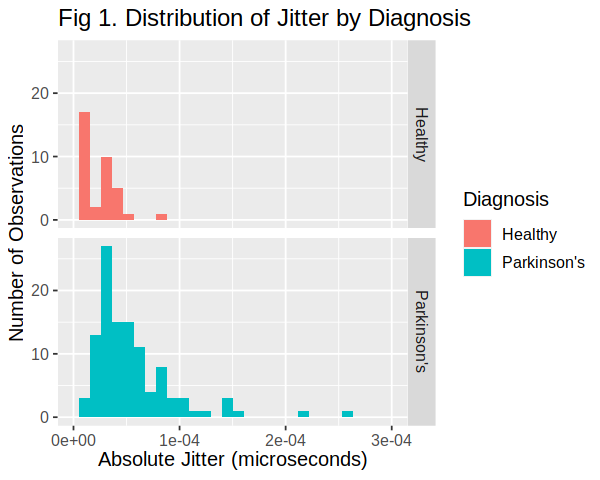

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”


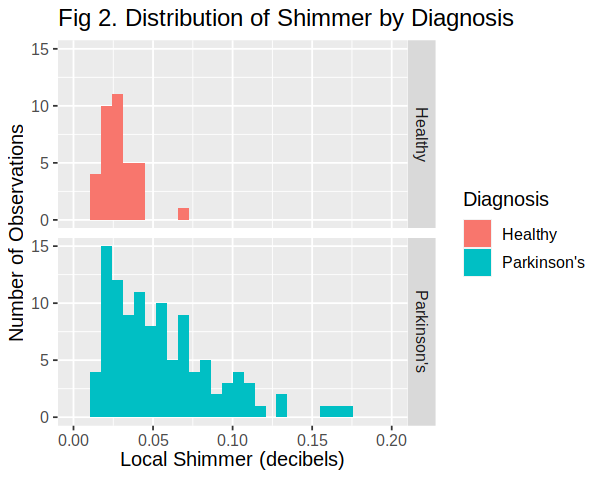

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”


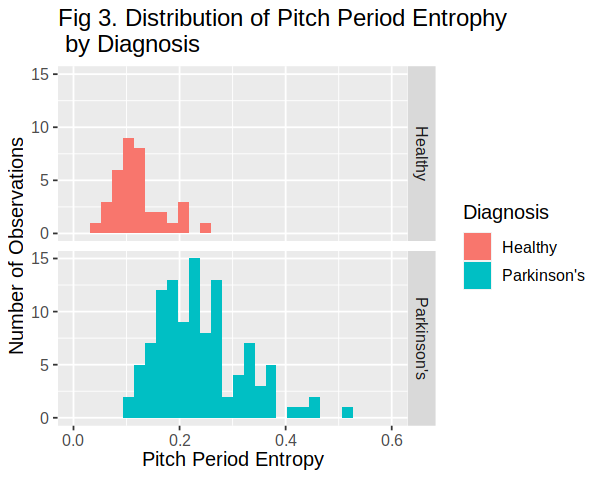

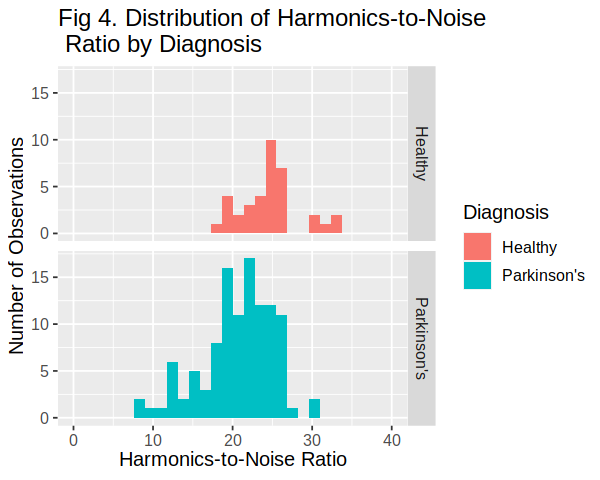

In [6]:
# preliminary data visualization - exploratory data analysis of training data

options(repr.plot.width = 5, repr.plot.height = 4)
jitter_plot <- parkinsons_train |>
    ggplot(aes(x = jitter, fill = status)) +
    geom_histogram() +
    facet_grid(rows = vars(status)) +
    labs(x = "Absolute Jitter (microseconds)",
         y = "Number of Observations",
         fill = "Diagnosis") +
    scale_x_continuous(limits = c(0, 0.0003)) +
    ggtitle("Fig 1. Distribution of Jitter by Diagnosis") +
    theme(text = element_text(size = 12))

jitter_plot

shimmer_plot <- parkinsons_train |>
    ggplot(aes(x = shimmer, fill = status)) +
    geom_histogram() +
    facet_grid(rows = vars(status)) +
    labs(x = "Local Shimmer (decibels)",
         y = "Number of Observations",
         fill = "Diagnosis") +
    scale_x_continuous(limits = c(0, 0.20)) +
    ggtitle("Fig 2. Distribution of Shimmer by Diagnosis") +
    theme(text = element_text(size = 12))

shimmer_plot

ppe_plot <- parkinsons_train |>
    ggplot(aes(x = ppe, fill = status)) +
    geom_histogram() +
    facet_grid(rows = vars(status)) +
    labs(x = "Pitch Period Entropy",
         y = "Number of Observations",
         fill = "Diagnosis") +
        scale_x_continuous(limits = c(0, 0.6)) +
    ggtitle("Fig 3. Distribution of Pitch Period Entrophy \n by Diagnosis") +
    theme(text = element_text(size = 12))

ppe_plot

hnr_plot <- parkinsons_train |>
    ggplot(aes(x = hnr, fill = status)) +
    geom_histogram() +
    facet_grid(rows = vars(status)) +
    labs(x = "Harmonics-to-Noise Ratio",
         y = "Number of Observations",
         fill = "Diagnosis") +
    scale_x_continuous(limits = c(0, 40)) +
    ggtitle("Fig 4. Distribution of Harmonics-to-Noise \n Ratio by Diagnosis") +
    theme(text = element_text(size = 12))

hnr_plot

## Preliminary Data Analysis Results

The preliminary data analysis shows that there were more Parkinson’s than healthy subjects in the dataset (Table 1). The distributions of absolute jitter (Fig. 1), shimmer (Fig. 2) and pitch period entropy (Fig. 3) were positively skewed for both healthy and Parkinson’s subjects, however, the distribution of harmonics-to-noise ratio (Fig.4), was negatively skewed. The distribution for healthy subjects had a smaller spread (lower variance) than Parkinson's for all four measures. The mean jitter, shimmer and pitch period entropy for Parkinson’s was higher than for healthy subjects, while harmonic-to-noise ratio was lower in Parkinson's subjects (Table 3). This preliminary exploratory data analysis helps understand patterns within the data and the difference in means of the four acoustic measures suggest that they may be useful in our classification analysis. 

# K-Nearest Neighbours Classification Analysis
To investigate our research question, k-nearest neighbours classification was performed using the `tidymodels` package. The optimal k value was selected using a 5-fold cross validation on the training set. 

First, to preprocess the data, the `recipe` function was used on the training data to specify the class label (`status`) and predictors. The data was centered and scaled using `step_center(all_predictors())` and `step_scale(all_predictors())` functions, respectively. The `nearest_neighbors` model specification was then created and tuned with the argument `neighbors = tune()`. A 5-fold cross validation was performed on the training data using the `vfold_cv` function and specifying the number of folds and label variable using the`v` and `strata` arguments, respectively. Next, the workflow analysis was performed by adding `parkinsons_recipe` and `parkinsons_spec` objects created. The `tune_grid` function was used to fit the model for each value ranging from 1 to 50 (by 2) from the `gridvals` tibble created. The metrics were collected and filtered to get the estimated accuracies for each k value tested. The optimal number of neighbors was decided by plotting k versus accuracy using `ggplot`. Fig. 5 shows that the highest accuracy estimate was when the number of neighbours (k) was 7. Therefore k = 7 was used in our final model.

To build our final model, we created a new model specification called `parkinsons_best_spec` for the optimal k value (k = 7) determined from cross-validation. The classifier was retrained by passing the new model specification and training data to the `fit` function. The final model was used to predict on the test data (`parkinsons_test`) and the accuracy of the classifier was tested by computing the metrics. The final accuracy and confusion matrix were reported to evaluate our classification model. 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8158621,5,0.03706856,Preprocessor1_Model01
3,accuracy,binary,0.8496552,5,0.02509435,Preprocessor1_Model02
5,accuracy,binary,0.8698851,5,0.02004882,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,accuracy,binary,0.7878161,5,0.019613116,Preprocessor1_Model23
47,accuracy,binary,0.7740230,5,0.007926869,Preprocessor1_Model24
49,accuracy,binary,0.7604598,5,0.009517352,Preprocessor1_Model25


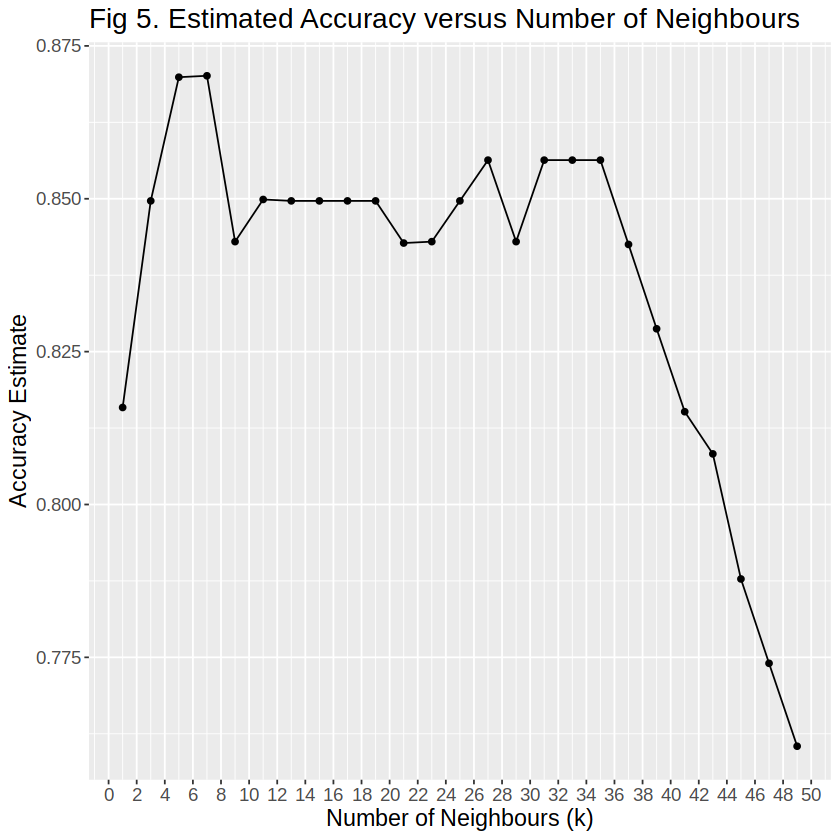

In [7]:
# K-nearest neighbours classification analysis
set.seed(1234)
options(repr.plot.height = 7, repr.plot.width = 7)

# Create recipe to standardize training data
parkinsons_recipe <- recipe(status ~., data = parkinsons_train) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

# Create nearest_neighbor model specification with tuning on number of neighbours
parkinsons_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# 5-fold cross-validation on training data
parkinsons_vfold <- vfold_cv(parkinsons_train, v = 5, strata = status)

# Create workflow with k ranging from 1 to 50 (by 2) and collect metrics
gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

parkinsons_results <- workflow() |>
    add_recipe(parkinsons_recipe) |>
    add_model(parkinsons_spec) |>
    tune_grid(resamples = parkinsons_vfold, grid = gridvals) |>
    collect_metrics()

accuracies <- parkinsons_results |>
    filter(.metric == "accuracy")
accuracies

# plot k (number of neighbours) vs accuracy to choose best k
parkinsons_k_plot <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    xlab("Number of Neighbours (k)") +
    ylab("Accuracy Estimate") +
    scale_x_continuous(breaks = seq(0, 50, by = 2)) +
    ggtitle("Fig 5. Estimated Accuracy versus Number of Neighbours") +
    theme(text = element_text(size = 14))

parkinsons_k_plot


In [8]:
# knn classification final model with optimal k 
parkinsons_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
    set_engine("kknn") |>
    set_mode("classification")

parkinsons_fit <- workflow() |>
    add_recipe(parkinsons_recipe) |>
    add_model(parkinsons_best_spec) |>
    fit(data = parkinsons_train)

# use final model to predict on test data
parkinsons_predictions <- predict(parkinsons_fit, parkinsons_test) |>
    bind_cols(parkinsons_test)

parkinsons_metrics <- parkinsons_predictions |>
    metrics(truth = status, estimate = .pred_class) |>
    filter(.metric == "accuracy") 
parkinsons_metrics

parkinsons_conf_matrix <- parkinsons_predictions |>
    conf_mat(truth = status, estimate = .pred_class)

parkinsons_conf_matrix

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.877551


             Truth
Prediction    Healthy Parkinson's
  Healthy           8           2
  Parkinson's       4          35

# Final Visualization

A stacked bar graph was plotted to visualize our final classification results and compare the true and predicted health status of observations in the test data (Fig. 6). To plot the graph, a data frame called `predictions_count` was first created by grouping the true `status` and predicted status (`.pred_class`) then summarizing to count the observations for each. This data frame provides the same information as the confusion matrix but allows us to use the data frame to plot the graph. The bar graph was plotted using `ggplot` and `geom_bar` with the `position = “fill”` argument to create a stacked bar graph with data as proportions. The graph shows the proportion of the classifier’s predicted health status for the true health status of subjects. For example, the bar for Parkinson’s shows that the classifier predicted Parkinson’s correctly for most observations in the test data (proportion coloured green), but a small proportion were classified incorrectly as healthy (proportion coloured red).

Table 4 shows that there were 4 false positives (8%) and 2 false negatives (4%) among all predictions. Fig. 6 allows to visualize this table, showing that the classifier had incorrect predictions for both groups. However, a greater proportion of healthy subjects were classified incorrectly compared to Parkinson’s subjects. Only a small proportion of subjects with Parkinson’s were misclassified as healthy by our classifier (5%), while a larger proportion of healthy subjects were misclassified as Parkinson’s by our classifier (33%). 


Joining with `by = join_by(status, jitter, shimmer, ppe, hnr)`
`summarise()` has grouped output by 'status'. You can override using the
`.groups` argument.




Table: Table 4. Classifier Predictions versus True Diagnosis

|status      |.pred_class |  n|
|:-----------|:-----------|--:|
|Healthy     |Healthy     |  8|
|Healthy     |Parkinson's |  4|
|Parkinson's |Healthy     |  2|
|Parkinson's |Parkinson's | 35|

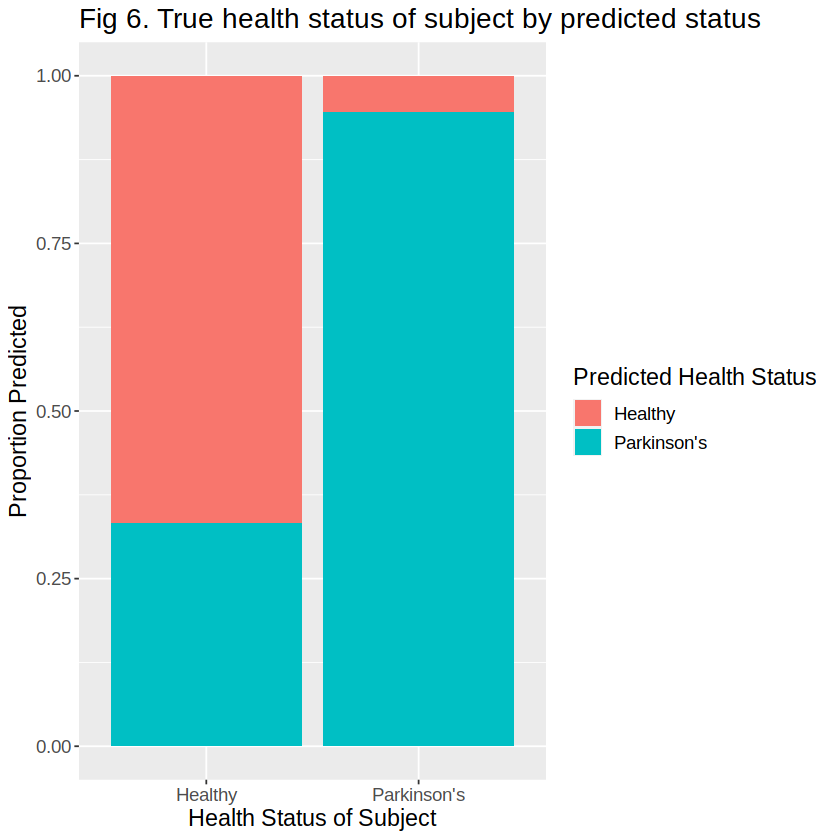

In [10]:
# Final Stacked Bar Graph  
predictions_count <- parkinsons_predictions |>
    semi_join(parkinsons_test) |>
    group_by(status, .pred_class) |>
    summarize(n=n())

predictions_count_table <- knitr::kable(predictions_count, caption = "Table 4. Classifier Predictions versus True Diagnosis")
predictions_count_table

parkinsons_final_graph <- predictions_count |>
   ggplot(aes(x = status, y = n, fill = .pred_class)) +
    geom_bar(position = "fill", stat = "identity") +
    labs(x = "Health Status of Subject", y = "Proportion Predicted", fill = "Predicted Health Status") +
    ggtitle("Fig 6. True health status of subject by predicted status") +
    theme(text = element_text(size = 14))
parkinsons_final_graph
    

# Discussion

## Summary of Findings
Our findings from our classifier support our expectations of existing differences in acoustic features between individuals with Parkinson’s Disease (PD) and healthy subjects. We established that voice problems, including abnormal voice quality, volume, and pitch, are viable biomarkers for detecting early-stage PD. 

Our classifier was identified to have an accuracy of 0.88 with the given dataset, correctly diagnosing PD through acoustic measurements in 88% of cases. We can further evaluate the error rate of the classifier and its quality by calculating the precision and recall of our classifier.


$$
\ Accuracy = \frac{\ number \ of \ correct \ predictions}{\ total \ number \ of \ predictions}\ = \frac{8+35}{8+2+4+35}\ = 0.88
$$


Precision quantifies how many predictions of Parkinson’s are in reality Parkinson’s, indicating that we can trust PD predictions given by our classifier as truly PD. The precision with a value of 0.90 implies that when the classifier reports a positive diagnosis of Parkinson’s Disease, we can assume there is a 10% probability that the classifier is false and that the patient is healthy. False positives may result in the misdiagnosis of healthy patients, and unnecessary treatment of Parkinson’s Disease.


$$
\ Precision = \frac{\ number \ of \ correct \ predictions}{\ total \ number \ of \ positive predictions}\ = \frac{35}{35+4}\ = 0.90 
$$


High recall indicates the rate at which the classifier will be able to consistently identify PD in our test data. A recall of 0.95 indicates that a misdiagnosis as healthy occurs in 5% of positive observations. False negatives may result in misdiagnosis of early onset PD, where Parkinson’s Disease may go untreated, with ranging health implications for the patient. 


$$
\ Recall = \frac{\ number \ of \ correct \ positive \ predictions}{\ total \ number \ of positive \ observations}\ = \frac{35}{35+2}\ = 0.95
$$



Recognizing that from the total test dataset, 8% of observations were misclassified as Parkinson's and 4% were misclassified as healthy (an aggregate 12% inaccuracy), this classifier would be sufficient to predict Parkinson's. However, among only healthy patients, 33% of individuals were misclassified as Parkinson’s, showing that improvements are needed to ensure healthy patients are not misclassified. This provides a basis for potentially using acoustic measures to predict Parkinson’s disease. Further analysis of each individual measure may provide insight into which acoustic measures would be best to detect Parkinson's. Our analysis shows that these acoustic measures may be a potential screening tool in the future, but future studies and other diagnostic tools are needed to confirm the diagnosis of Parkinson's and to ensure healthy subjects are not misclassified. 


## Comparing Expectations to Reality
Our findings are in line with our expected outcome as jitter, shimmer, harmonics-to-noise ratio, and pitch period entropy were sufficient predictors for early detection of PD. However, due to the higher rate of false positives, further studies are needed to determine the effectiveness of applied acoustic measures in detecting Parkinson's disease. Our analysis shows that our identified acoustic measures have a statistical basis as a potential screening tool in the future, but currently leave significant room for improvement and optimization.

## Potential Impact
Our findings suggest that voice analysis could become an early diagnostic screening tool and help initiate earlier treatment, potentially slowing disease progression. In the larger scope of medicine, the study’s findings can generate awareness regarding the utility of acoustic measurements for neurological and neurodegenerative disorders.

One key implication of our research is the ability to detect vocal changes associated with PD during the prodromal phase. This can aid in early detection which is crucial in the management of PD. However, a 10% false-positive rate and a 5% false-negative rate of our classifier indicate the need for further refinements. If improvements are made, this could pave the way for non-invasive, early screening tools for PD, facilitating timely interventions and improving patient outcomes. Future research could focus on larger, more diverse, patient populations. There is also a need to study a sample with more healthy subjects, as the low sample size of healthy subjects in our dataset may have resulted in the high misclassification among only healthy individuals. This study further provokes interest in other diagnostic tools and acoustic biomarkers that could be included to create more comprehensive diagnostic models. 


## Future Questions
Future questions that might arise from our findings:
1. Is there an existing market for acoustic diagnostic systems in medicine (for pre-screening patients), and what are the acceptable margins of error for early-detection devices of PD?
    + What is the accuracy of other leading early-detection or diagnostic tools/methods used for identifying Parkinson’s Disease (and how well does our classifier place)?
    + Is our classifier competitive with other leading early detection or diagnostic tools/methods? 
2. Are there other measurable acoustic variables (within our original dataset, or that could be added to our dataset) that could be applied to improve the accuracy of our model? 
3. Can the model be applied to diagnosing other neurological and neurodegenerative disorders with symptoms that affect vocals and speech?


## References

Harel, B., Cannizzaro, M., & Snyder, P. J. (2004). Variability in fundamental frequency during speech in prodromal and incipient parkinson's disease: A longitudinal case study. Brain and Cognition, 56(1), 24-29. https://doi.org/10.1016/j.bandc.2004.05.002

Jiménez-Jiménez, F. J., Gamboa, J., Nieto, A., Guerrero, J., Orti-Pareja, M., Molina, J. A., García-Albea, E., & Cobeta, I. (1997). Acoustic voice analysis in untreated patients with parkinson's disease. Parkinsonism & Related Disorders, 3(2), 111-116. https://doi.org/10.1016/S1353-8020(97)00007-2

Little, M. A., McSharry, P. E., Hunter, E. J., Spielman, J., & Ramig, L. O. (2009). Suitability of dysphonia measurements for telemonitoring of parkinson's disease. IEEE Transactions on Biomedical Engineering, 56(4), 1015-1022. https://doi.org/10.1109/TBME.2008.2005954

Ma, A., Lau, K. K., & Thyagarajan, D. (2020). Voice changes in Parkinson’s disease: What are they telling us?. Journal of Clinical Neuroscience, 72, 1-7. https://doi.org/10.1016/j.jocn.2019.12.029